In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import seaborn as sns

In [3]:
walmart_data = r'C:\Users\himan\Downloads\Walmart_Store_sales.csv'

In [4]:
df = pd.read_csv(walmart_data)

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#convert datetime as it is a string type

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


We see that there are no null values. Now we will see the first question - Which store has maximum sales?

In [9]:
maxsales_Walmart = df.groupby('Store')['Weekly_Sales'].sum()

In [10]:
maxsales_Walmart.sort_values(ascending = False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

The store having the maximum sales is store 20 and the store with least sales is store 33

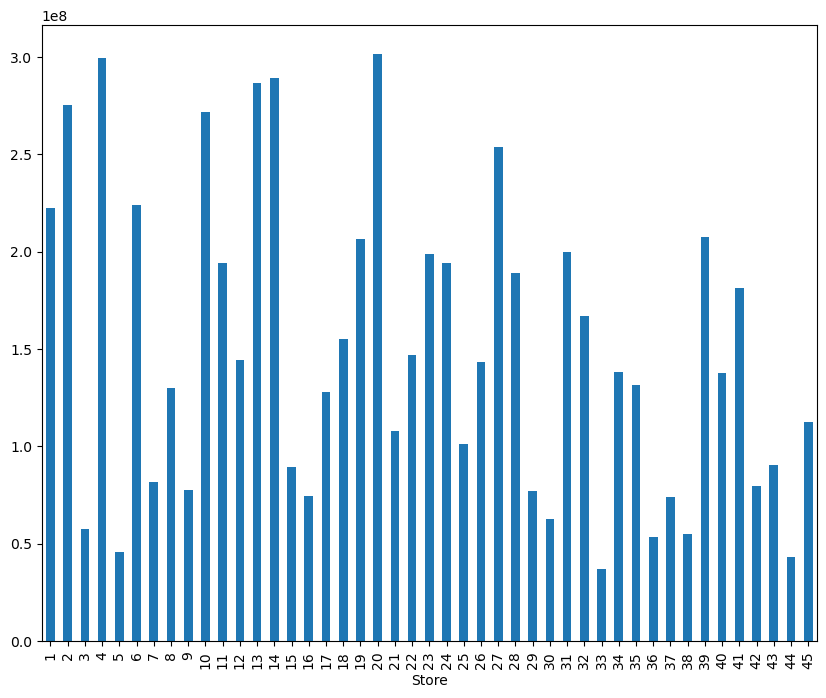

In [11]:
plt.figure(figsize=(10,8))
axes = maxsales_Walmart.plot(kind='bar')

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Standard deviation is a measure to see how spread out the data is from the mean.

In [12]:
avg_sales =df['Weekly_Sales'].mean()

In [13]:
avg_sales

1046964.8775617732

In [14]:
std_dev = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

In [15]:
std_dev.head(5)

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

The store with highest standard edviation is store 14 with 317569.949476 dollar sales.

In [16]:
#Split date, day and year
df['Day']= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


Find out the coefficient of mean to standard deviation?

In [17]:
coeff_mean = df.groupby('Store')['Weekly_Sales'].std()/df.groupby('Store')['Weekly_Sales'].mean()

In [18]:
coeff_mean

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

Which store/s has good quarterly growth rate in Q3’2012?

In [19]:
Walmart_q3 = df[(df['Date']>'2012-07-01') & (df['Date']<'2012-09-30')].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)

In [20]:
Walmart_q1 = df[(df['Date']>'2012-01-01') & (df['Date']<'2012-03-31')].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)

In [21]:
Walmart_q2 = df[(df['Date']>'2012-04-01') & (df['Date']<'2012-06-30')].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)

In [22]:
Walmart_q4 = df[(df['Date']>'2012-10-01') & (df['Date']<'2012-12-31')].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)

In [23]:
Walmart_q3.head()

Store
4     25652119.35
20    24665938.11
13    24319994.35
2     22396867.61
10    21169356.45
Name: Weekly_Sales, dtype: float64

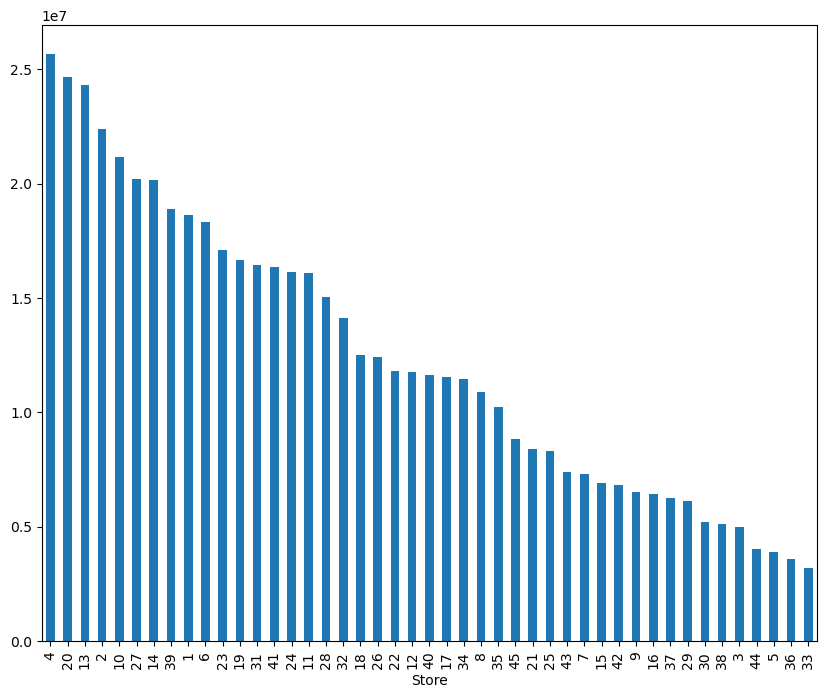

In [24]:
plt.figure(figsize=(10,8))
axes = Walmart_q3.plot(kind='bar')

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [25]:
holiday_sales= df.loc[df['Holiday_Flag']== 1, 'Weekly_Sales'].sum()

In [26]:
holiday_sales

505299551.56

In [27]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

In [28]:
no_holiday_sales= df.loc[df['Holiday_Flag']== 0, 'Weekly_Sales'].sum()

In [29]:
no_holiday_sales

6231919435.55

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [31]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [32]:
df.loc[(df['Date']=='2010-02-12') | (df['Date']=='2011-02-11') | (df['Date']=='2012-02-10'), 'SuperBowl'] = 1
df.loc[(df['Date']!='2010-02-12') & (df['Date']!='2011-02-11') & (df['Date']!='2012-02-10'), 'SuperBowl'] = 0

In [33]:
df.loc[(df['Date']=='2010-12-31') | (df['Date']== '2011-12-30'), 'NewYear'] = 1
df.loc[(df['Date']!='2010-12-31') & (df['Date']!= '2011-12-30'), 'NewYear'] = 0

In [34]:
df.loc[(df['Date']=='2010-09-10') | (df['Date']=='2011-09-09') | (df['Date']=='2012-09-07'), 'LabourDay'] = 1
df.loc[(df['Date']!='2010-09-10') & (df['Date']!='2011-09-09') & (df['Date']!='2012-09-07'), 'LabourDay'] = 0

In [35]:
df.loc[(df['Date']=='2011-11-25') | (df['Date'] == '2010-11-26'), 'ThanksGiving'] = 1
df.loc[(df['Date']!='2011-11-25') & (df['Date'] != '2010-11-26'), 'ThanksGiving'] = 0

In [36]:
sales_holiday= df.groupby('Date')['Weekly_Sales'].sum()

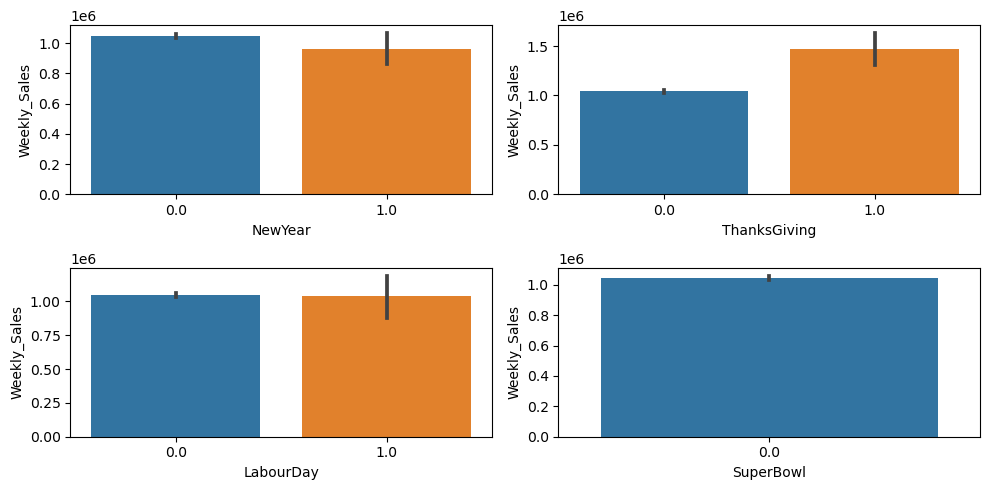

In [37]:
cols = ['NewYear','ThanksGiving','LabourDay','SuperBowl']

plt.figure(figsize=(10,5))
for num,i in enumerate(cols,1):
    plt.subplot(2,2,num)
    sns.barplot(x=df[i],y='Weekly_Sales',data=df)
plt.tight_layout()
plt.show()

Provide a monthly and semester view of sales in units and give insights

In [38]:
df['Month_Year'] = pd.to_datetime(df['Date']).dt.to_period('M')

In [39]:
monthly_sales= df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [40]:
df['Semester']= np.where(df['Month'] <= 6, '1st Semester', '2nd Semester')
semester_sales = df.groupby(['Year', 'Semester'])['Weekly_Sales'].sum().reset_index()

In [41]:
monthly_sales

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [42]:
semester_sales

,Year,Semester,Weekly_Sales
0,2010,1st Semester,1.026913e+09
1,2010,2nd Semester,1.261973e+09
2,2011,1st Semester,1.138060e+09
3,2011,2nd Semester,1.310140e+09
4,2012,1st Semester,1.163004e+09
5,2012,2nd Semester,8.371288e+08


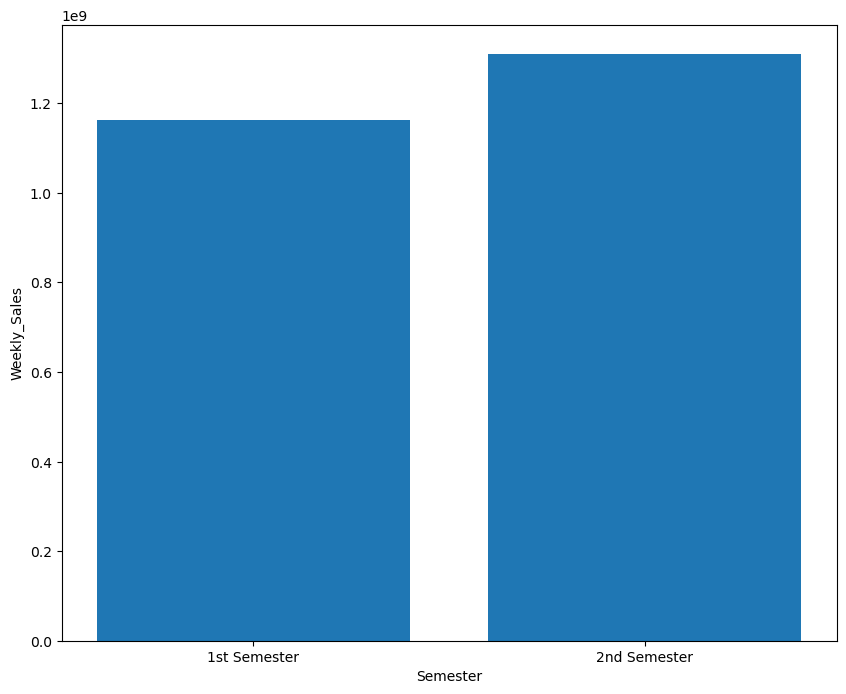

In [43]:
plt.figure(figsize=(10,8))
plt.bar(semester_sales['Semester'], semester_sales['Weekly_Sales'])
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')
plt.show()

In [44]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'SuperBowl', 'NewYear', 'LabourDay', 'ThanksGiving', 'Month_Year',
       'Semester'],
      dtype='object')